In [3]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('seaborn-v0_8-pastel')
cmap = plt.get_cmap('coolwarm')
plt.set_cmap(cmap)

<Figure size 432x288 with 0 Axes>

In [4]:
import statsmodels.distributions.copula.api as cp

# copula gaussina corr=0.5
gc = cp.GaussianCopula(corr=0.5)

# copula t-student df=2, dim=2
stc = cp.StudentTCopula(df=2, k_dim=2)

# copula Clayton \theta=1
clc = cp.ClaytonCopula(theta = 1)

# copula Gumbel \theta=2
gmc = cp.GumbelCopula(theta=2)

# copula Frank \theta=1
frc = cp.FrankCopula(theta=1)

In [16]:
def CFD3d(cop, title, resl=50):
    Z = np.zeros((resl, resl), dtype=np.float64)
    for i,u in enumerate(np.linspace(0,1, num=resl)):
        for j,v in enumerate(np.linspace(0,1, num=resl)):
            Z[i,j] = cop.cdf([u,v])
    # Creamos una cuadrícula de puntos en el plano (u,v)
    u = v = np.linspace(0, 1, resl)
    U, V = np.meshgrid(u, v)

    # Graficamos la copula de min(u,v) usando plot_surface() y decoramos el gráfico
    fig = plt.figure(figsize=(12,8))
    ax = fig.add_subplot(111, projection='3d')
    surf = ax.plot_surface(U, V, Z, cmap='coolwarm')
    fig.colorbar(surf, shrink=0.5, aspect=10)
    ax.set_xlabel('$u$', fontsize=14)
    ax.set_ylabel('$v$', fontsize=14)
    ax.set_zlabel('$C(u,v)$', fontsize=14)
    #ax.set_zlim(0,10)
    #ax.view_init(elev=15, azim=90)
    ax.set_title(title, fontsize=16)
    plt.savefig(title + "cfd.pdf", format='pdf')
    plt.show()

In [5]:
def PDF3d(cop, title, resl=50):
    Z = np.zeros((resl, resl), dtype=np.float64)
    for i,u in enumerate(np.linspace(0,1, num=resl)):
        for j,v in enumerate(np.linspace(0,1, num=resl)):
            Z[i,j] = cop.pdf([u,v])
    # Creamos una cuadrícula de puntos en el plano (u,v)
    u = v = np.linspace(0, 1, resl)
    U, V = np.meshgrid(u, v)

    # Graficamos la copula de min(u,v) usando plot_surface() y decoramos el gráfico
    fig = plt.figure(figsize=(12,8))
    ax = fig.add_subplot(111, projection='3d')
    surf = ax.plot_surface(U, V, Z, cmap='coolwarm')
    fig.colorbar(surf, shrink=0.5, aspect=10)
    ax.set_xlabel('$u$', fontsize=14)
    ax.set_ylabel('$v$', fontsize=14)
    ax.set_zlabel('$c(u,v)$', fontsize=14)
    #ax.set_zlim(0,10)
    #ax.view_init(elev=15, azim=90)
    ax.set_title(title, fontsize=16)
    plt.savefig(title + "pdf.pdf", format='pdf')
    plt.show()
    return plt

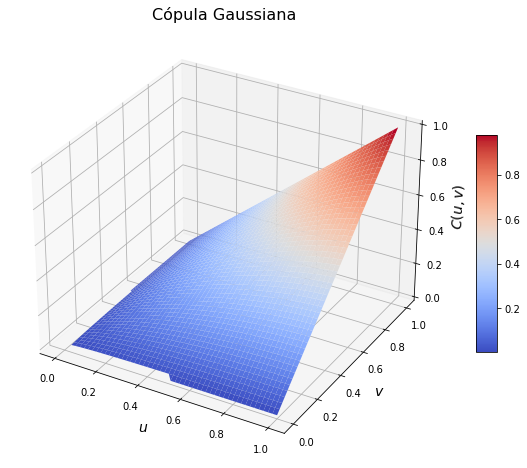

In [31]:
CFD3d(gc, title="Cópula Gaussiana")

/home/jorge/anaconda3/envs/ml/lib/python3.9/site-packages/statsmodels/distributions/copula/elliptical.py:52: RuntimeWarning: invalid value encountered in double_scalars
  return mv_pdf_ppf / np.prod(self.distr_uv.pdf(ppf), axis=-1)


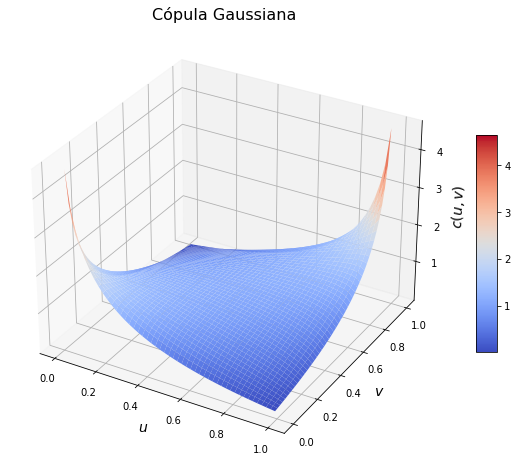

In [40]:
PDF3d(gc, title="Cópula Gaussiana")

In [35]:
CFD3d(stc, title="Cópula t-student")

NotImplementedError: CDF not available in closed form.

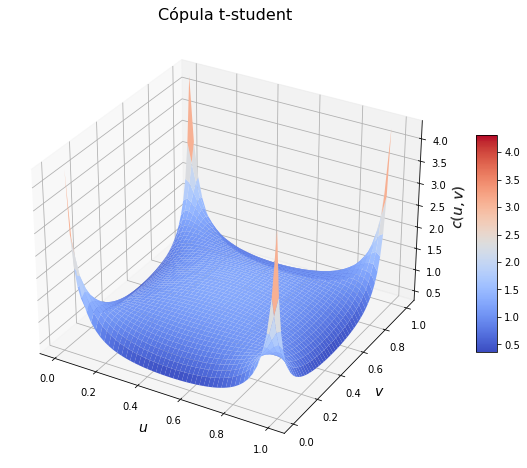

In [6]:
PDF3d(stc, title="Cópula t-student")

/home/jorge/anaconda3/envs/ml/lib/python3.9/site-packages/statsmodels/distributions/copula/archimedean.py:177: RuntimeWarning: divide by zero encountered in reciprocal
  return (np.sum(u ** (-th), axis=1) - 1) ** (-1.0 / th)


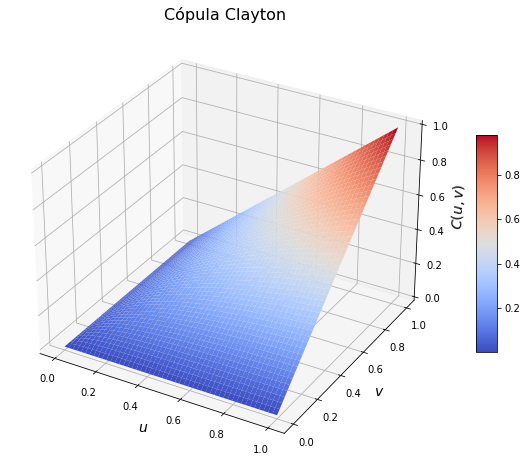

In [21]:
CFD3d(clc, title="Cópula Clayton")

/home/jorge/anaconda3/envs/ml/lib/python3.9/site-packages/statsmodels/distributions/copula/archimedean.py:165: RuntimeWarning: divide by zero encountered in power
  a = (th + 1) * np.prod(u, axis=1) ** -(th + 1)
/home/jorge/anaconda3/envs/ml/lib/python3.9/site-packages/statsmodels/distributions/copula/archimedean.py:166: RuntimeWarning: divide by zero encountered in reciprocal
  b = np.sum(u ** -th, axis=1) - 1
/home/jorge/anaconda3/envs/ml/lib/python3.9/site-packages/statsmodels/distributions/copula/archimedean.py:168: RuntimeWarning: invalid value encountered in multiply
  return a * b ** c


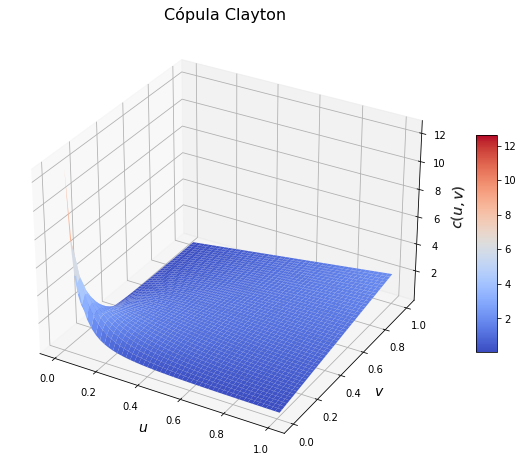

In [42]:
PDF3d(clc, title="Cópula Clayton")

/home/jorge/anaconda3/envs/ml/lib/python3.9/site-packages/statsmodels/distributions/copula/archimedean.py:383: RuntimeWarning: divide by zero encountered in log
  h = np.sum((-np.log(u)) ** th, axis=1)


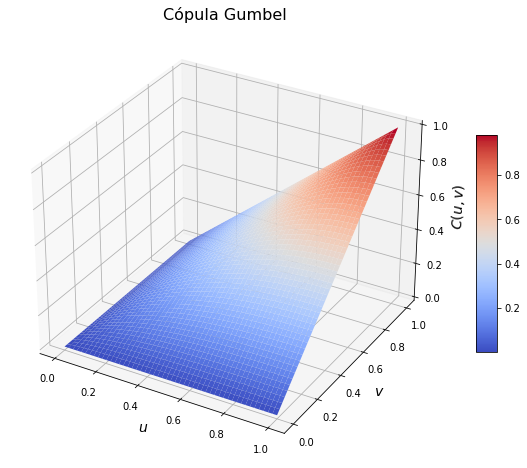

In [23]:
CFD3d(gmc, title="Cópula Gumbel")

/home/jorge/anaconda3/envs/ml/lib/python3.9/site-packages/statsmodels/distributions/copula/archimedean.py:366: RuntimeWarning: divide by zero encountered in log
  xy = -np.log(u)
/home/jorge/anaconda3/envs/ml/lib/python3.9/site-packages/statsmodels/distributions/copula/archimedean.py:376: RuntimeWarning: divide by zero encountered in reciprocal
  e = np.prod(u, axis=1) ** (- 1.0)
/home/jorge/anaconda3/envs/ml/lib/python3.9/site-packages/statsmodels/distributions/copula/archimedean.py:378: RuntimeWarning: invalid value encountered in multiply
  return a * b * c * d * e
/home/jorge/anaconda3/envs/ml/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/jorge/anaconda3/envs/ml/lib/python3.9/site-packages/statsmodels/distributions/copula/archimedean.py:374: RuntimeWarning: divide by zero encountered in power
  c = sum_xy_theta ** (1.0 / th - 2)


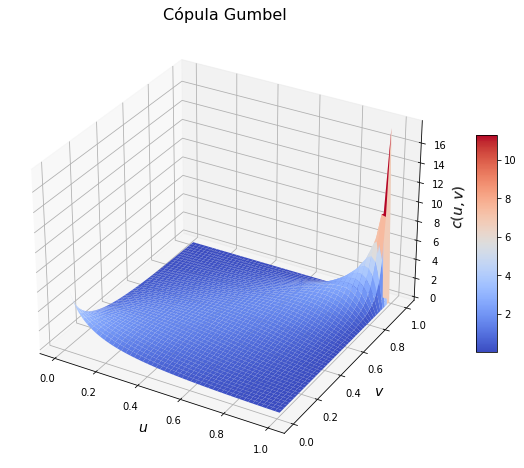

In [43]:
PDF3d(gmc, title="Cópula Gumbel")

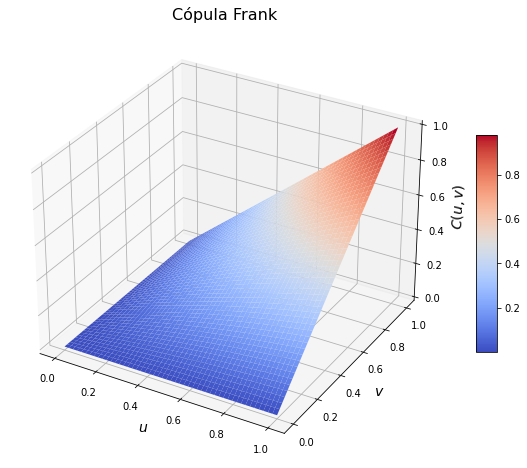

In [25]:
CFD3d(frc, title="Cópula Frank")

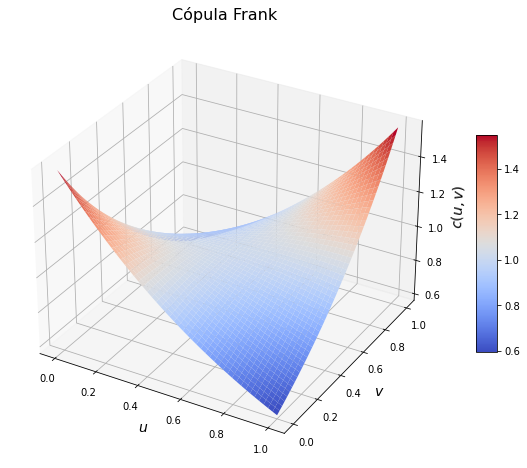

In [44]:
PDF3d(frc, title="Cópula Frank")